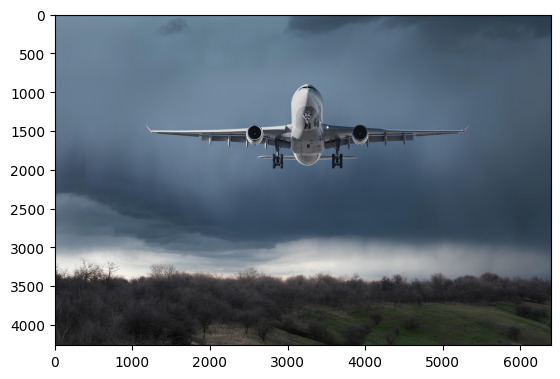

In [342]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread('acidente_mendonca.jpeg'))

## Agrupa acidentes aeronáuticos em clusters definidos pelo modelo

Os dados utilizados nesse projeto foram analisados, limpos e tratados no projeto:
https://github.com/jairobernardesjunior/Cenipa_limpa_trata_armazena

São dados disponibilizados pelo Cenipa-Centro de Investigação e Prevenção de Acidentes Aeronáuticos da Força Aérea Brasileira.

## Faz o reconhecimento dos dados para selecionar as variáveis que vão ser incluidas no treinamento do modelo de clusterização de acidentes aeronáuticos.

In [313]:
# importa bibliotecas
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler,
    MinMaxScaler,
    PowerTransformer,
)
from sklearn.compose import ColumnTransformer

from scipy.stats import skew 
from scipy.stats import kurtosis 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import warnings
warnings.simplefilter('ignore')

In [314]:
# carrega arquivos em dataframes
df_acidentes_aero = pd.read_csv('arquivos/df_acidentes_aeronauticos.csv')

In [315]:
# verifica o tamanho do arquivo
df_acidentes_aero.shape

(9819, 45)

In [316]:
# reconhecendo as variáveis disponíveis
df_acidentes_aero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9819 entries, 0 to 9818
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ocorrencia_classificacao         9819 non-null   object 
 1   ocorrencia_cidade                9819 non-null   object 
 2   ocorrencia_uf                    9819 non-null   object 
 3   ocorrencia_pais                  9819 non-null   object 
 4   ocorrencia_aerodromo             9819 non-null   object 
 5   ocorrencia_dia                   9819 non-null   object 
 6   ocorrencia_hora                  9819 non-null   object 
 7   investigacao_status              8405 non-null   object 
 8   total_aeronaves_envolvidas       9819 non-null   int64  
 9   ocorrencia_saida_pista           9819 non-null   object 
 10  ocorrencia_latitude              9819 non-null   float64
 11  ocorrencia_longitude             9819 non-null   float64
 12  aeronave_matricula  

In [317]:
# confirma a inexistência de nulos
df_acidentes_aero.isnull().sum()

ocorrencia_classificacao              0
ocorrencia_cidade                     0
ocorrencia_uf                         0
ocorrencia_pais                       0
ocorrencia_aerodromo                  0
ocorrencia_dia                        0
ocorrencia_hora                       0
investigacao_status                1414
total_aeronaves_envolvidas            0
ocorrencia_saida_pista                0
ocorrencia_latitude                   0
ocorrencia_longitude                  0
aeronave_matricula                    0
aeronave_tipo_veiculo                 0
aeronave_fabricante                   0
aeronave_modelo                       0
aeronave_tipo_icao                    1
aeronave_motor_tipo                   0
aeronave_motor_quantidade             0
aeronave_pmd                          0
aeronave_pmd_categoria                0
aeronave_assentos                     0
aeronave_ano_fabricacao               0
aeronave_pais_fabricante              0
aeronave_pais_registro                0


In [318]:
# apaga coluna com nulos
df_acidentes_aero = df_acidentes_aero.drop('investigacao_status', axis=1)

In [319]:
# apaga registros com nulos
df_acidentes_aero = df_acidentes_aero.dropna()

In [320]:
df_acidentes_aero.duplicated().sum()

0

In [321]:
df_acidentes_aero.shape

(9818, 44)

In [322]:
# verifica o conteúdo das variáveis
df_acidentes_aero.head(2)

,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_latitude,ocorrencia_longitude,aeronave_matricula,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,fator_nome,fator_aspecto,fator_condicionante,fator_area,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario,periodo
0,INCIDENTE,LONDRINA,PR,BRASIL,SBLO,2007-01-01,2024-05-16 00:00:00,1,NÃO,0.0,0.0,PTVQL,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-810D,PA34,PISTÃO,BIMOTOR,2155,2155,6.0,1993.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,PARTIDA DO MOTOR,PRIVADA,***,0,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,***,***,***,***,***,***,***,***,00:00 às 06:00
1,INCIDENTE,LONDRINA,PR,BRASIL,***,2007-01-01,2024-05-16 21:10:00,1,NÃO,0.0,0.0,PTRON,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-711ST,P28T,PISTÃO,MONOMOTOR,1315,1315,4.0,1982.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,INDETERMINADA,PRIVADA,NENHUM,0,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,***,***,***,***,***,***,***,***,18:00 às 00:00


In [323]:
# seleciona somente colunas(variáveis) numéricas
df_number = df_acidentes_aero.select_dtypes(include="number").columns
print(len(df_number))
print(df_number)

8
Index(['total_aeronaves_envolvidas', 'ocorrencia_latitude',
       'ocorrencia_longitude', 'aeronave_pmd', 'aeronave_pmd_categoria',
       'aeronave_assentos', 'aeronave_ano_fabricacao',
       'aeronave_fatalidades_total'],
      dtype='object')


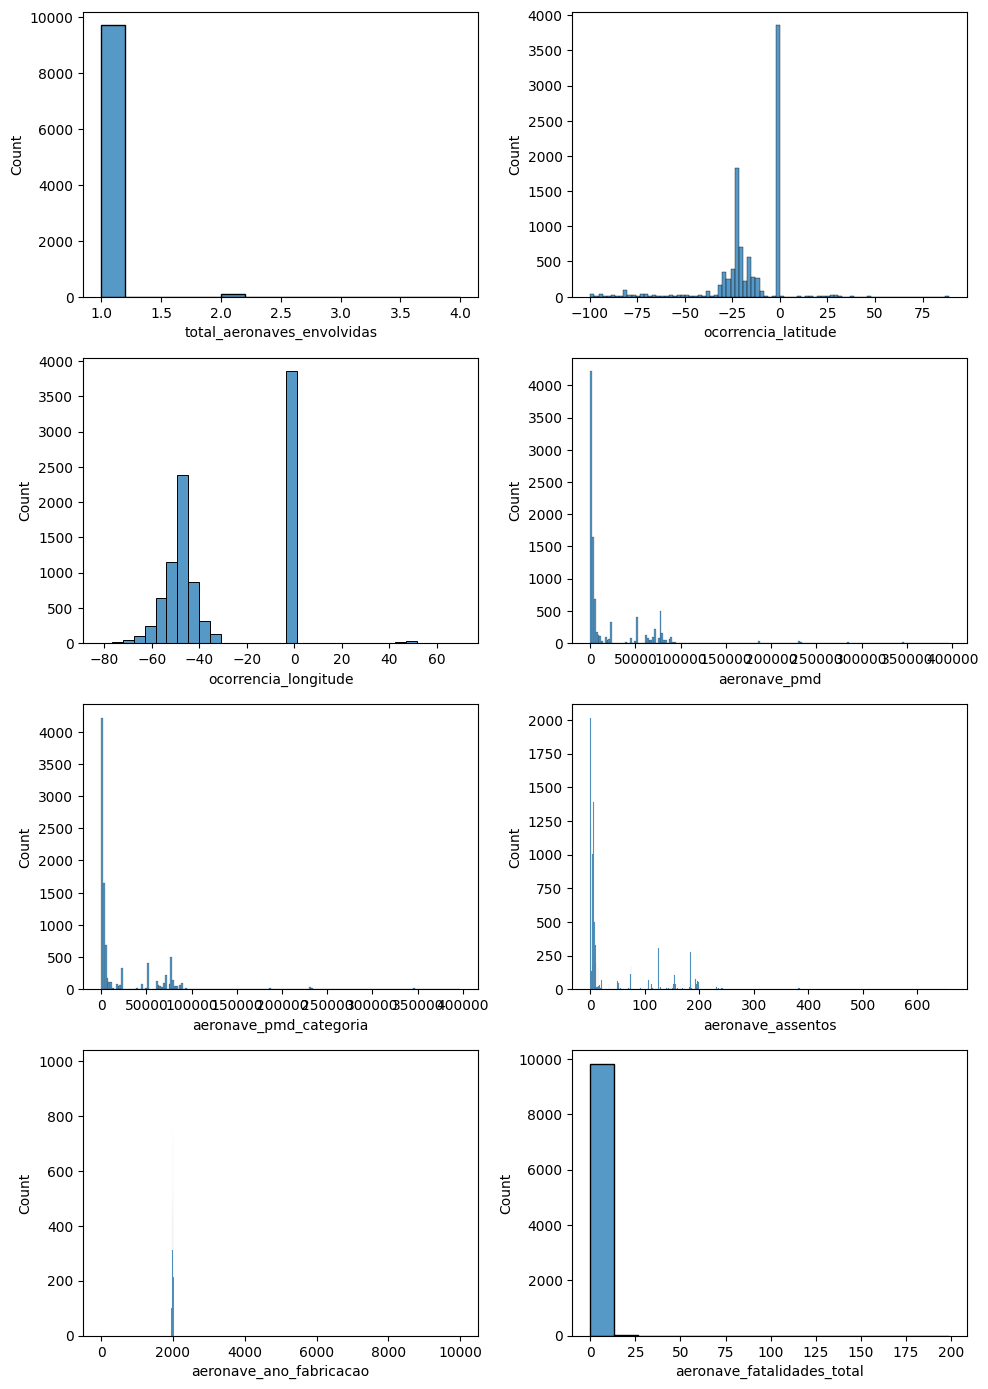

In [324]:
# plota histogramas de variáveis numéricas
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10, 14), tight_layout=True)

for ax, feature in zip(axs.flatten(), df_number):
    sns.histplot(x=feature, ax=ax, data=df_acidentes_aero)

plt.show()

In [325]:
df_acidentes_aero.head(1)

,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_latitude,ocorrencia_longitude,aeronave_matricula,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,fator_nome,fator_aspecto,fator_condicionante,fator_area,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario,periodo
0,INCIDENTE,LONDRINA,PR,BRASIL,SBLO,2007-01-01,2024-05-16 00:00:00,1,NÃO,0.0,0.0,PTVQL,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-810D,PA34,PISTÃO,BIMOTOR,2155,2155,6.0,1993.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,PARTIDA DO MOTOR,PRIVADA,***,0,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,***,***,***,***,***,***,***,***,00:00 às 06:00


In [326]:
colunas_onehot = [
        'ocorrencia_classificacao',
        'ocorrencia_uf', 
        'ocorrencia_saida_pista',
        'aeronave_tipo_veiculo',
        'aeronave_motor_tipo',
        'aeronave_motor_quantidade',
        'aeronave_ano_fabricacao',
        'aeronave_fase_operacao',
        'aeronave_tipo_operacao',
        'aeronave_nivel_dano',
        'fator_nome',
        'fator_aspecto',
        'fator_condicionante',
        'fator_area',
        'recomendacao_status',
        'periodo',
        'total_aeronaves_envolvidas', 

        'aeronave_pmd', 
        'aeronave_assentos', 
        'aeronave_fatalidades_total'      
        ]

colunas_nro = [
        'ocorrencia_latitude',
        'ocorrencia_longitude',         
        ]

In [327]:
df_acidentes_aero = df_acidentes_aero[[
        'ocorrencia_classificacao',
        'ocorrencia_uf', 
        'ocorrencia_saida_pista',
        'aeronave_tipo_veiculo',
        'aeronave_motor_tipo',
        'aeronave_motor_quantidade',
        'aeronave_ano_fabricacao',
        'aeronave_fase_operacao',
        'aeronave_tipo_operacao',
        'aeronave_nivel_dano',
        'fator_nome',
        'fator_aspecto',
        'fator_condicionante',
        'fator_area',
        'recomendacao_status',
        'periodo',
        'total_aeronaves_envolvidas', 

        'aeronave_pmd', 
        'aeronave_assentos', 
        'aeronave_fatalidades_total',      

        'ocorrencia_latitude',
        'ocorrencia_longitude', 
        ]]

In [328]:
df_acidentes_aero = df_acidentes_aero.sort_index()

In [329]:
df_acidentes_aero.head(5)

,ocorrencia_classificacao,ocorrencia_uf,ocorrencia_saida_pista,aeronave_tipo_veiculo,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_ano_fabricacao,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,fator_nome,fator_aspecto,fator_condicionante,fator_area,recomendacao_status,periodo,total_aeronaves_envolvidas,aeronave_pmd,aeronave_assentos,aeronave_fatalidades_total,ocorrencia_latitude,ocorrencia_longitude
0,INCIDENTE,PR,NÃO,AVIÃO,PISTÃO,BIMOTOR,1993.0,PARTIDA DO MOTOR,PRIVADA,***,***,***,***,***,***,00:00 às 06:00,1,2155,6.0,0,0.0,0.0
1,INCIDENTE,PR,NÃO,AVIÃO,PISTÃO,MONOMOTOR,1982.0,INDETERMINADA,PRIVADA,NENHUM,***,***,***,***,***,18:00 às 00:00,1,1315,4.0,0,0.0,0.0
2,INCIDENTE,PE,NÃO,AVIÃO,JATO,BIMOTOR,0.0,INDETERMINADA,***,***,***,***,***,***,***,18:00 às 00:00,1,0,0.0,0,0.0,0.0
3,INCIDENTE,PR,NÃO,AVIÃO,PISTÃO,MONOMOTOR,1991.0,MUDANÇA DE NÍVEL OU ALTITUDE,INSTRUÇÃO,***,***,***,***,***,***,00:00 às 06:00,1,770,2.0,0,0.0,0.0
4,INCIDENTE,PR,NÃO,AVIÃO,PISTÃO,BIMOTOR,1976.0,TÁXI,TÁXI AÉREO,NENHUM,***,***,***,***,***,18:00 às 00:00,1,3175,10.0,0,0.0,0.0


In [330]:
preprocessing = ColumnTransformer(
    [
        ("one-hot", OneHotEncoder(), colunas_onehot),
        #("standard", StandardScaler(), colunas_nro),
        ("minmax", MinMaxScaler(), colunas_nro),
        #("power", PowerTransformer(), colunas_nro),
    ]
)

preprocessing.fit_transform(df_acidentes_aero).toarray()

array([[0.        , 1.        , 0.        , ..., 0.        , 0.5281773 ,
        0.53790148],
       [0.        , 1.        , 0.        , ..., 0.        , 0.5281773 ,
        0.53790148],
       [0.        , 1.        , 0.        , ..., 0.        , 0.5281773 ,
        0.53790148],
       ...,
       [0.        , 1.        , 0.        , ..., 0.        , 0.40854222,
        0.27038411],
       [1.        , 0.        , 0.        , ..., 0.        , 0.4036187 ,
        0.23597232],
       [0.        , 1.        , 0.        , ..., 0.        , 0.42820542,
        0.21886566]])

In [331]:
df_acidentes_aero_trans = pd.DataFrame(
    preprocessing.fit_transform(df_acidentes_aero).toarray(),
    columns=preprocessing.get_feature_names_out(), 
)

In [332]:
df_acidentes_aero_trans = pd.concat([df_acidentes_aero, df_acidentes_aero_trans], axis=1)

In [333]:
df_acidentes_aero_trans.head(3)

,ocorrencia_classificacao,ocorrencia_uf,ocorrencia_saida_pista,aeronave_tipo_veiculo,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_ano_fabricacao,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,fator_nome,fator_aspecto,fator_condicionante,fator_area,recomendacao_status,periodo,total_aeronaves_envolvidas,aeronave_pmd,aeronave_assentos,aeronave_fatalidades_total,ocorrencia_latitude,ocorrencia_longitude,one-hot__ocorrencia_classificacao_ACIDENTE,one-hot__ocorrencia_classificacao_INCIDENTE,one-hot__ocorrencia_classificacao_INCIDENTE GRAVE,one-hot__ocorrencia_uf_***,one-hot__ocorrencia_uf_AC,one-hot__ocorrencia_uf_AL,one-hot__ocorrencia_uf_AM,one-hot__ocorrencia_uf_AP,one-hot__ocorrencia_uf_BA,one-hot__ocorrencia_uf_CE,one-hot__ocorrencia_uf_DF,one-hot__ocorrencia_uf_ES,one-hot__ocorrencia_uf_GO,one-hot__ocorrencia_uf_MA,one-hot__ocorrencia_uf_MG,one-hot__ocorrencia_uf_MS,one-hot__ocorrencia_uf_MT,one-hot__ocorrencia_uf_PA,one-hot__ocorrencia_uf_PB,one-hot__ocorrencia_uf_PE,one-hot__ocorrencia_uf_PI,one-hot__ocorrencia_uf_PR,one-hot__ocorrencia_uf_RJ,one-hot__ocorrencia_uf_RN,one-hot__ocorrencia_uf_RO,one-hot__ocorrencia_uf_RR,one-hot__ocorrencia_uf_RS,one-hot__ocorrencia_uf_SC,one-hot__ocorrencia_uf_SE,one-hot__ocorrencia_uf_SP,one-hot__ocorrencia_uf_TO,one-hot__ocorrencia_saida_pista_NÃO,one-hot__ocorrencia_saida_pista_SIM,one-hot__aeronave_tipo_veiculo_***,one-hot__aeronave_tipo_veiculo_ANFÍBIO,one-hot__aeronave_tipo_veiculo_AVIÃO,one-hot__aeronave_tipo_veiculo_BALÃO,one-hot__aeronave_tipo_veiculo_DIRIGÍVEL,one-hot__aeronave_tipo_veiculo_GIROCÓPTERO,one-hot__aeronave_tipo_veiculo_HELICÓPTERO,one-hot__aeronave_tipo_veiculo_HIDROAVIÃO,one-hot__aeronave_tipo_veiculo_PLANADOR,one-hot__aeronave_tipo_veiculo_TRIKE,one-hot__aeronave_tipo_veiculo_ULTRALEVE,one-hot__aeronave_motor_tipo_***,one-hot__aeronave_motor_tipo_JATO,one-hot__aeronave_motor_tipo_PISTÃO,one-hot__aeronave_motor_tipo_SEM TRAÇÃO,one-hot__aeronave_motor_tipo_TURBOEIXO,one-hot__aeronave_motor_tipo_TURBOÉLICE,one-hot__aeronave_motor_quantidade_***,one-hot__aeronave_motor_quantidade_BIMOTOR,one-hot__aeronave_motor_quantidade_MONOMOTOR,one-hot__aeronave_motor_quantidade_QUADRIMOTOR,one-hot__aeronave_motor_quantidade_SEM TRAÇÃO,one-hot__aeronave_motor_quantidade_TRIMOTOR,one-hot__aeronave_ano_fabricacao_0.0,one-hot__aeronave_ano_fabricacao_1900.0,one-hot__aeronave_ano_fabricacao_1936.0,one-hot__aeronave_ano_fabricacao_1940.0,one-hot__aeronave_ano_fabricacao_1942.0,one-hot__aeronave_ano_fabricacao_1944.0,one-hot__aeronave_ano_fabricacao_1945.0,one-hot__aeronave_ano_fabricacao_1946.0,one-hot__aeronave_ano_fabricacao_1947.0,one-hot__aeronave_ano_fabricacao_1948.0,one-hot__aeronave_ano_fabricacao_1949.0,one-hot__aeronave_ano_fabricacao_1950.0,one-hot__aeronave_ano_fabricacao_1951.0,one-hot__aeronave_ano_fabricacao_1952.0,one-hot__aeronave_ano_fabricacao_1953.0,one-hot__aeronave_ano_fabricacao_1954.0,one-hot__aeronave_ano_fabricacao_1955.0,one-hot__aeronave_ano_fabricacao_1956.0,one-hot__aeronave_ano_fabricacao_1957.0,one-hot__aeronave_ano_fabricacao_1958.0,one-hot__aeronave_ano_fabricacao_1959.0,one-hot__aeronave_ano_fabricacao_1960.0,one-hot__aeronave_ano_fabricacao_1961.0,one-hot__aeronave_ano_fabricacao_1962.0,one-hot__aeronave_ano_fabricacao_1963.0,one-hot__aeronave_ano_fabricacao_1964.0,one-hot__aeronave_ano_fabricacao_1965.0,one-hot__aeronave_ano_fabricacao_1966.0,one-hot__aeronave_ano_fabricacao_1967.0,one-hot__aeronave_ano_fabricacao_1968.0,one-hot__aeronave_ano_fabricacao_1969.0,one-hot__aeronave_ano_fabricacao_1970.0,one-hot__aeronave_ano_fabricacao_1971.0,one-hot__aeronave_ano_fabricacao_1972.0,one-hot__aeronave_ano_fabricacao_1973.0,one-hot__aeronave_ano_fabricacao_1974.0,one-hot__aeronave_ano_fabricacao_1975.0,one-hot__aeronave_ano_fabricacao_1976.0,one-hot__aeronave_ano_fabricacao_1977.0,one-hot__aeronave_ano_fabricacao_1978.0,one-hot__aeronave_ano_fabricacao_1979.0,one-hot__aeronave_ano_fabricacao_1980.0,one-hot__aeronave_ano_fabricacao_

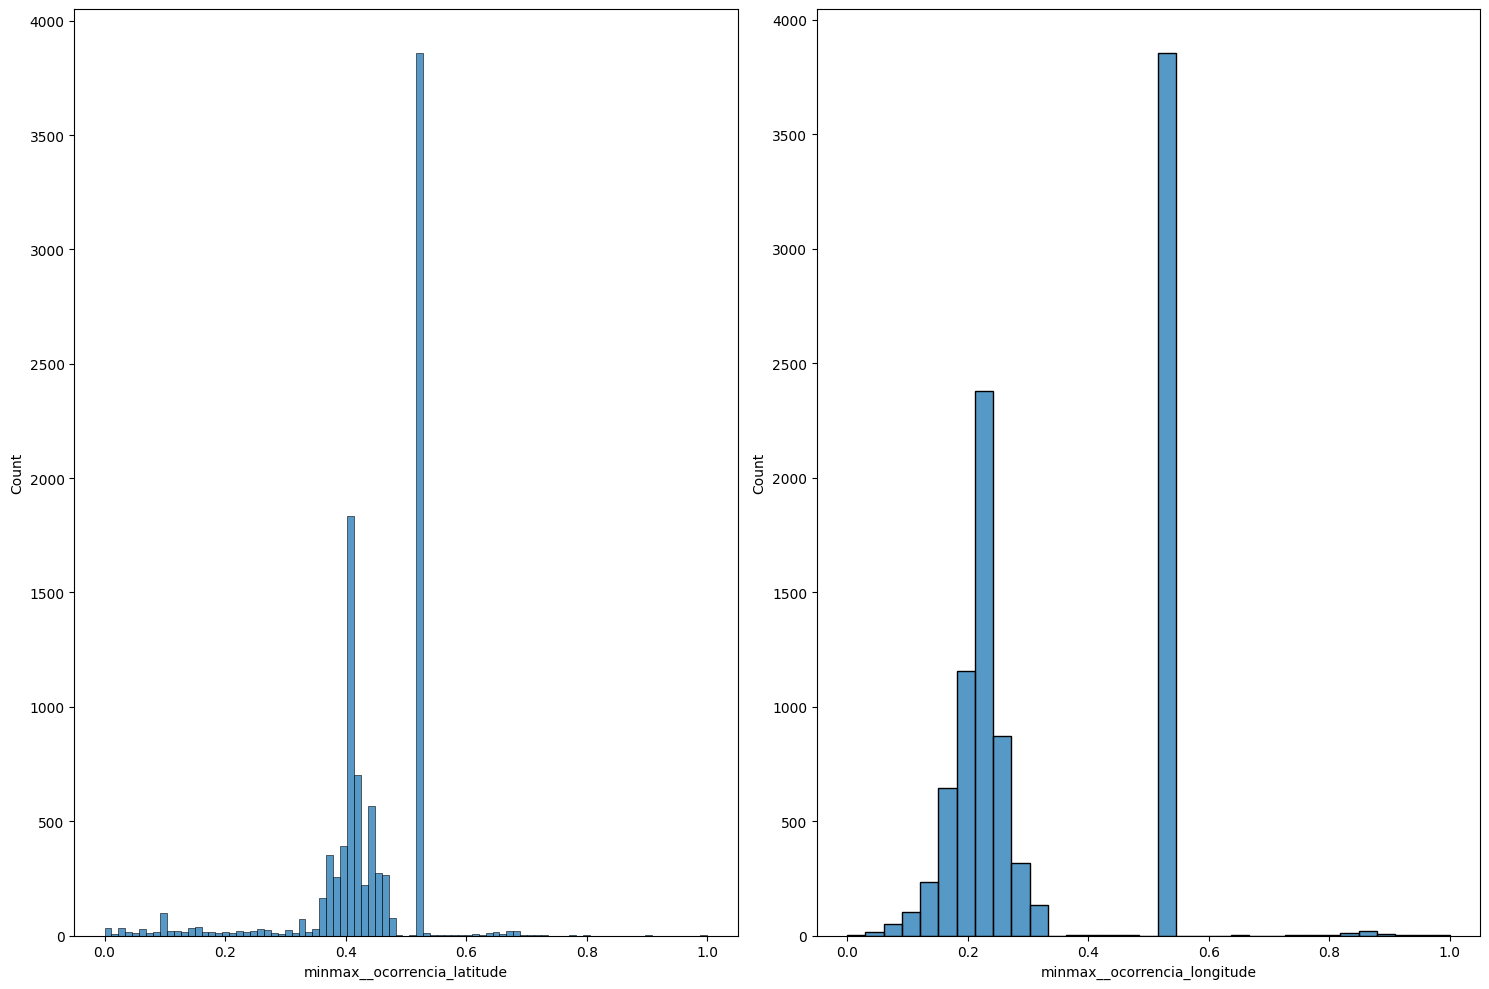

In [334]:
# plota histogramas de variáveis numéricas
colunas = ["minmax__ocorrencia_latitude", 
           "minmax__ocorrencia_longitude",          
           ]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 10), tight_layout=True)

for ax, feature in zip(axs.flatten(), colunas):
    sns.histplot(x=feature, ax=ax, data=df_acidentes_aero_trans)

plt.show()

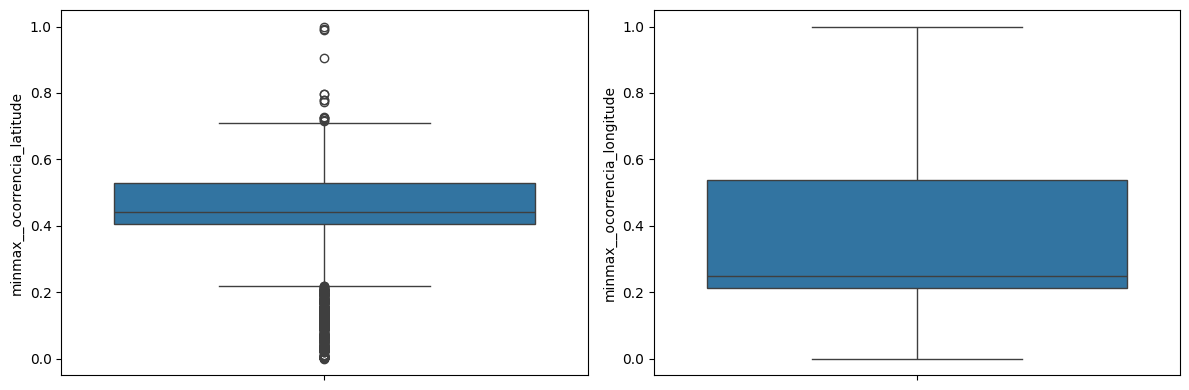

In [335]:
search_outliers = ["minmax__ocorrencia_latitude", 
                   "minmax__ocorrencia_longitude",
                    ]
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), tight_layout=True)

for i, column in enumerate(search_outliers):
    sns.boxplot(y=column, data=df_acidentes_aero_trans, ax=axs[i])

plt.show()

In [336]:
def retira_outliers(dfx, x):
    q75,q25 = np.percentile(dfx.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    dfx.loc[dfx[x] < min,x] = np.nan
    dfx.loc[dfx[x] > max,x] = np.nan

    dfx = dfx.dropna(axis = 0)
            
    return dfx

In [337]:
# chama função para retirar outliers
df_acidentes_aero_trans = retira_outliers(df_acidentes_aero_trans, 'minmax__ocorrencia_latitude')
df_acidentes_aero_trans = retira_outliers(df_acidentes_aero_trans, 'minmax__ocorrencia_latitude')

In [338]:
df_acidentes_aero_trans.shape

(9357, 1064)

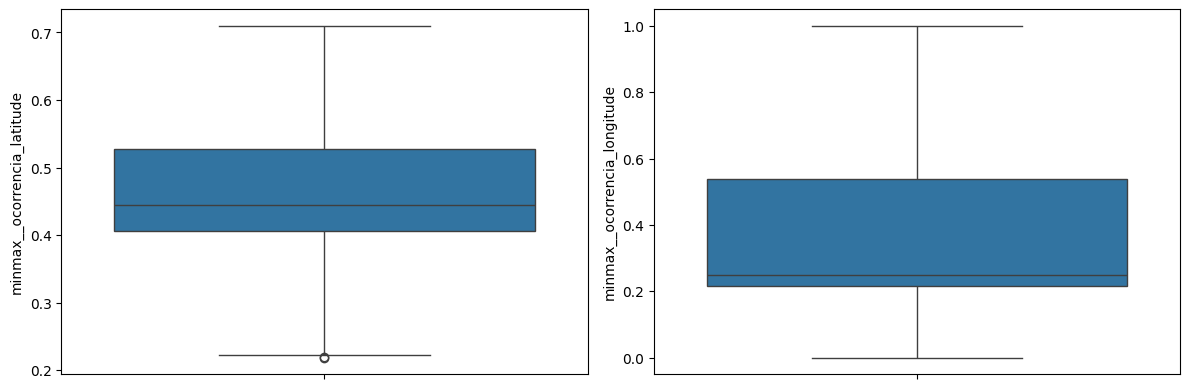

In [339]:
search_outliers = ["minmax__ocorrencia_latitude", "minmax__ocorrencia_longitude"]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), tight_layout=True)

for i, column in enumerate(search_outliers):
    sns.boxplot(y=column, data=df_acidentes_aero_trans, ax=axs[i])

plt.show()

In [340]:
print('skew latitude', skew(df_acidentes_aero_trans['minmax__ocorrencia_latitude'], axis=0, bias=True))
print('kurtosis latitude',kurtosis(df_acidentes_aero_trans['minmax__ocorrencia_latitude'], axis=0, bias=True))
print('')
print('skew longitude', skew(df_acidentes_aero_trans['minmax__ocorrencia_longitude'], axis=0, bias=True))
print('kurtosis longitude',kurtosis(df_acidentes_aero_trans['minmax__ocorrencia_longitude'], axis=0, bias=True))

skew latitude -0.17528627751385945
kurtosis latitude -0.12953609226281282

skew longitude 0.3495005230645742
kurtosis longitude -1.4491548407332269


In [341]:
# salva os dados tratados em arquivo csv organizado pelo índice
df_acidentes_aero_trans.sort_index().to_csv('arquivos_tratados/df_acidentes_aero_trans.csv', index=False)